In [1]:
import pandas as pd
import numpy as np
import json
import collections
from collections import Counter, OrderedDict
from natsort import index_natsorted, natsorted, ns
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

In [2]:
cellData = pd.read_csv('cellData.tsv', sep='\t')
geneData = pd.read_csv('geneData.tsv', sep='\t')
gene_panel = np.unique(geneData.Gene.values)

In [3]:
mylist = []
for index, row in cellData.iterrows():
    arr = json.loads(row.Prob)
    idx = np.argmax(arr)
    ClassName = eval(row.ClassName)
    mylist.append(ClassName[idx])
# out
mylist = sorted(mylist)

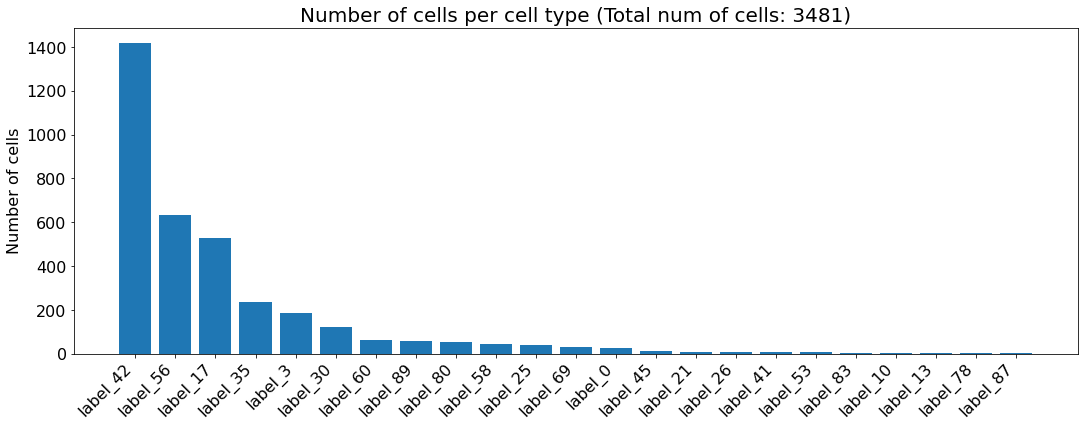

In [4]:
fig, ax = plt.subplots(figsize=(18,6))

co = collections.Counter(mylist)
co = OrderedDict(co.most_common())
plt.bar(range(len(co.keys())), list(co.values()), tick_label=list(co.keys()))

plt.title('Number of cells per cell type (Total num of cells: %d)' % cellData.shape[0],  fontsize=20)
plt.ylabel('Number of cells', fontsize=16)
ax.set_xticklabels(list(co.keys()), rotation = 45, ha="right")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.savefig('cells_per_class.png', bbox_inches = 'tight')

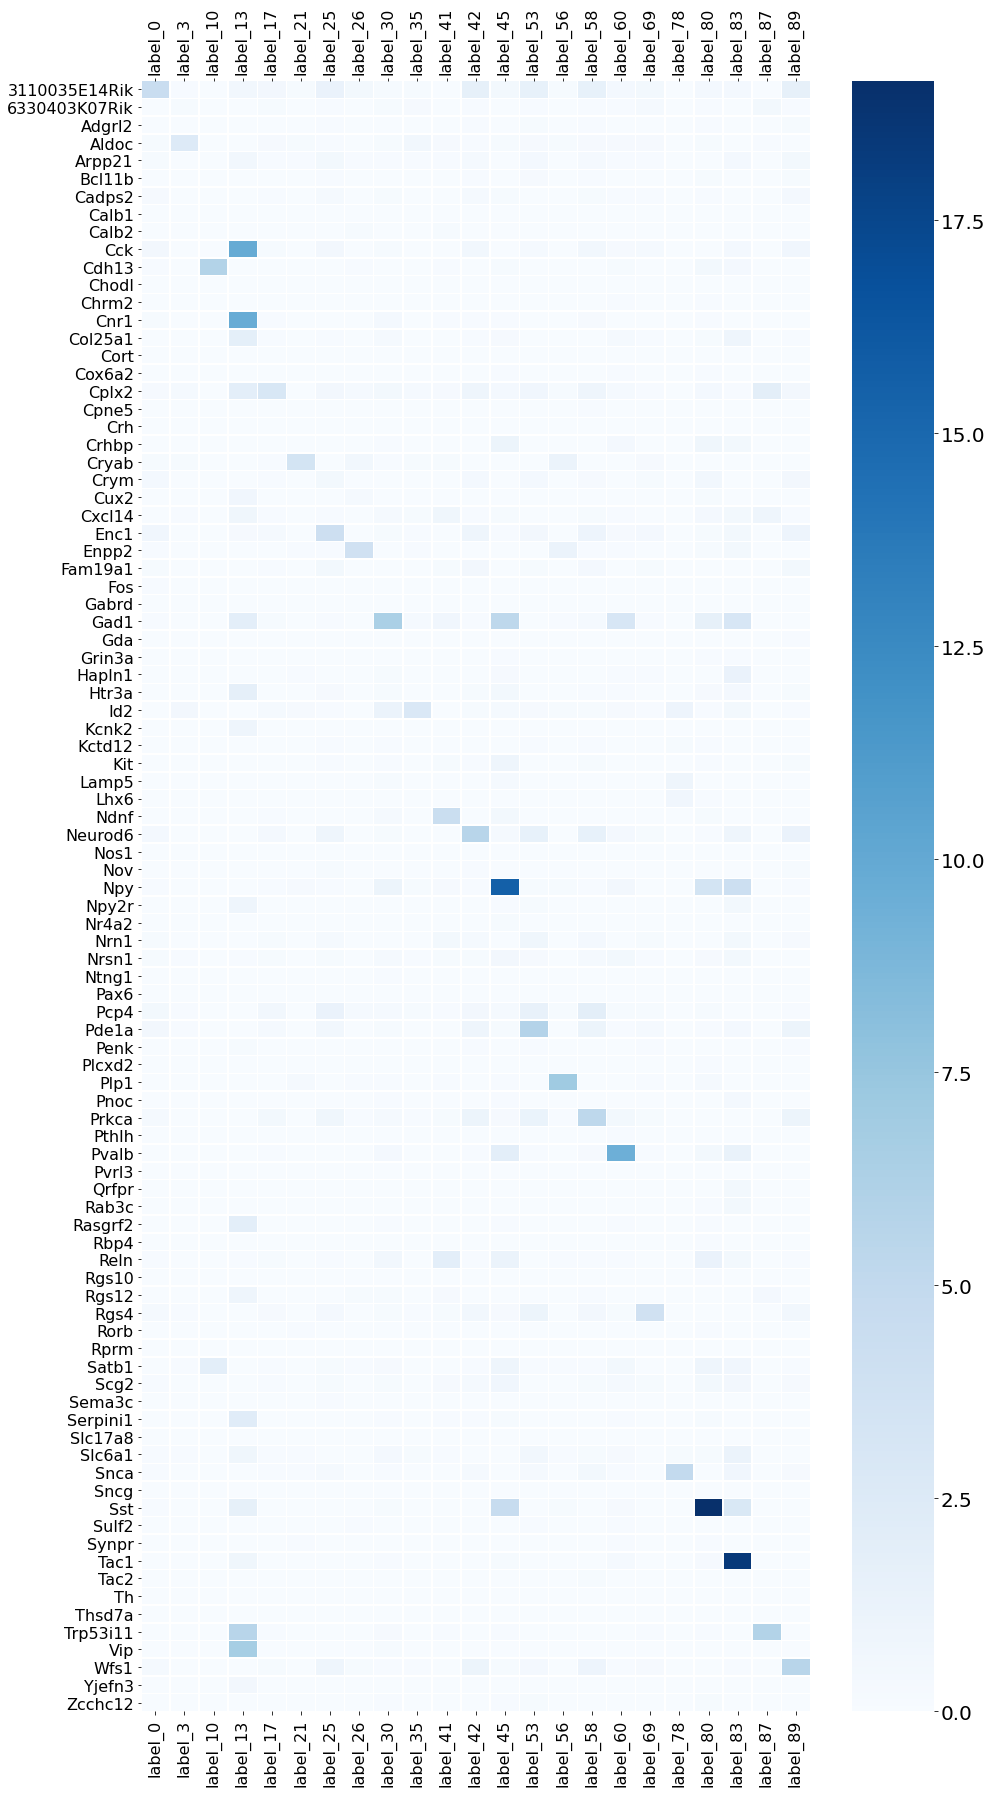

In [5]:
mylist = []
for index, row in cellData.iterrows():
    arr = json.loads(row.Prob)
    idx = np.argmax(arr)
    ClassName = eval(row.ClassName)
    mylist.append(ClassName[idx])
# out
# mylist = sorted(mylist)
df = pd.DataFrame(columns=gene_panel, index=mylist)
for i in range(df.shape[0]):
    cols = eval(cellData.iloc[i].Genenames)
    vals = eval(cellData.iloc[i].CellGeneCount)
    df.iloc[i][cols] = vals

df = df.fillna(0)
df = df.groupby(axis=0, level=0).mean()
df = df.T
df = df.sort_index(axis=1,
                   key=lambda x: np.argsort(index_natsorted(df.columns.values))
                   )
plt.figure(figsize = (15,30))
# ax = sns.heatmap(df, annot=True, cmap="YlGnBu")
ax = sns.heatmap(df, annot=False, cmap="Blues", linewidths=.5)
# plt.savefig('heatmap.png')
# ax.set_xticklabels(rotation = 90, ha="center")
ax.tick_params(top=True, labeltop=True)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(rotation='vertical')
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig('heatmap.png')

In [6]:
cellData.shape

(3481, 13)

In [7]:
df.to_csv('counts_per_class.csv')

In [8]:
np.random.seed(2021)
nC = 3482
K = 92
rd = np.random.dirichlet([nC / K] * K)
# class_prior = np.append(0.5 * rd, 0.5)
class_prior = rd
class_labels = ['label_'+str(i) for i in range(K)]
# class_labels.append('Zero')

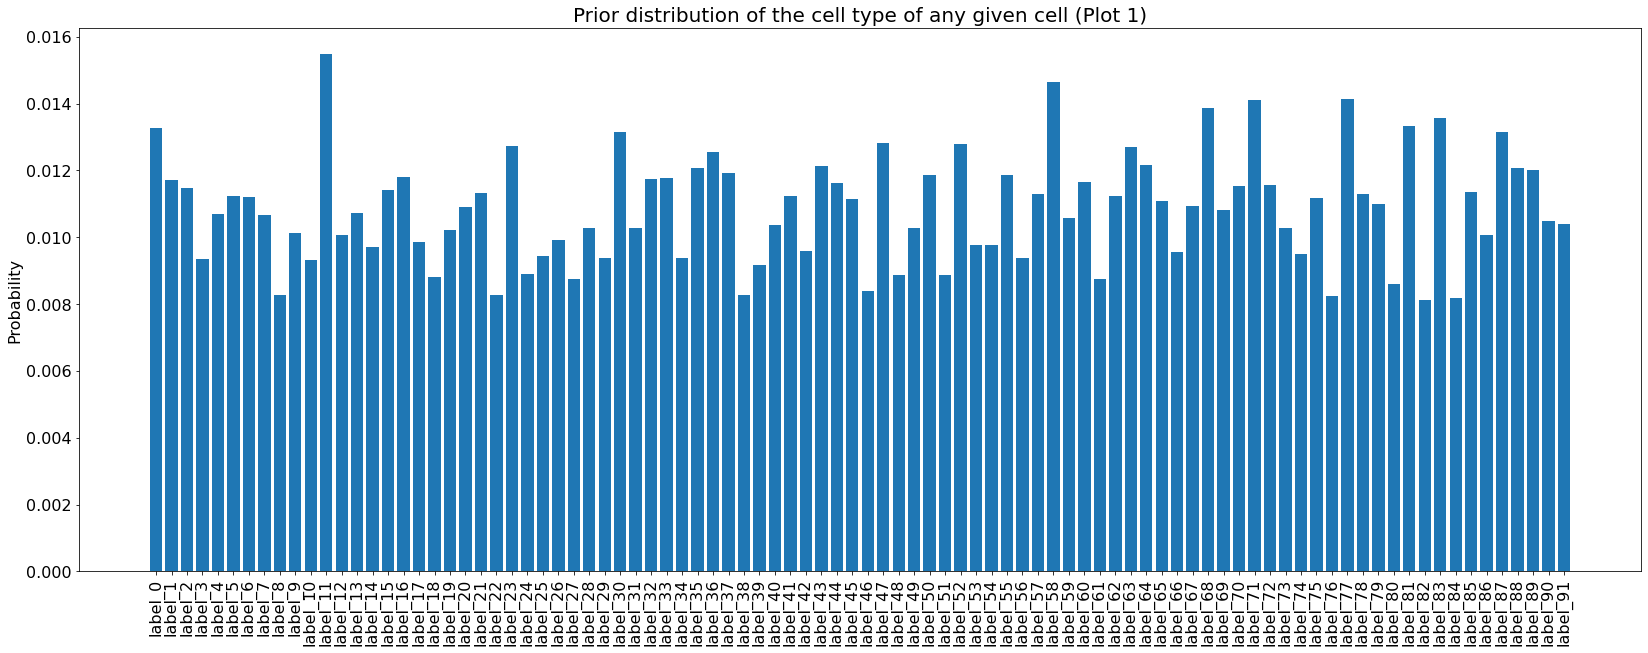

In [9]:
fig, ax = plt.subplots(figsize=(28,10))

plt.bar(range(len(class_labels)), list(class_prior), tick_label=class_labels)

plt.title('Prior distribution of the cell type of any given cell (Plot 1)',  fontsize=20)
plt.ylabel('Probability', fontsize=16)
ax.set_xticklabels(class_labels, rotation = 'vertical', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=2)
plt.savefig('cell_type_prior_1.png', bbox_inches = 'tight')

In [10]:
df = pd.read_csv('cell_type_probs.csv')

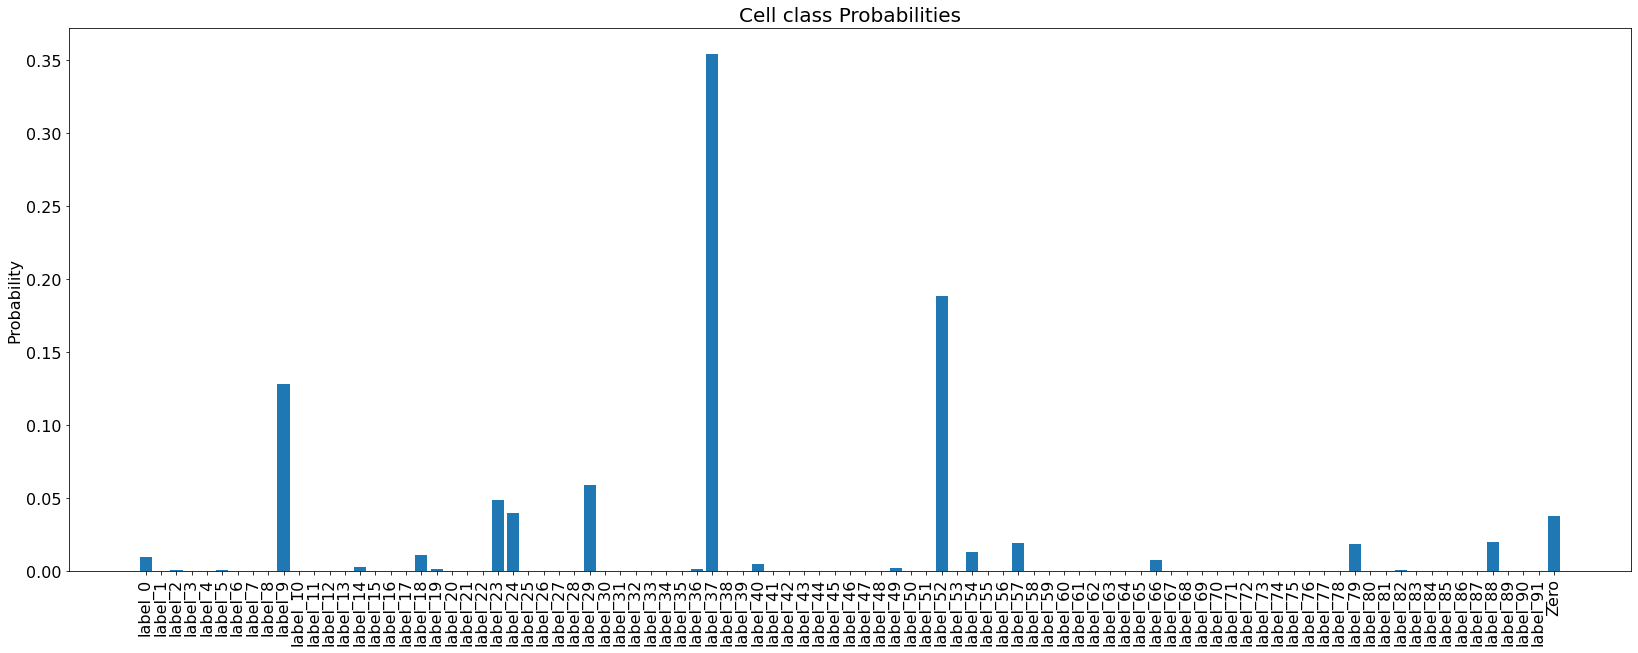

In [11]:
fig, ax = plt.subplots(figsize=(28,10))

plt.bar(range(len(df.Name)), df.Prob.values, tick_label=df.Prob.values)

plt.title('Cell class Probabilities',  fontsize=20)
plt.ylabel('Probability', fontsize=16)
ax.set_xticklabels(df.Name.values, rotation = 'vertical', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=2)
plt.savefig('cell_type_probs.png', bbox_inches = 'tight')